In [1]:
import torch
import math
import glob
import os.path as osp
import random
import numpy as np
import json
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

dtype = torch.float
device = torch.device("cpu")

In [14]:
import torchvision
from torchvision import models, transforms

In [3]:
torch.manual_seed(62)
np.random.seed(123)
random.seed(1234)

In [4]:
x = torch.linspace(-math.pi, math.pi, 1000, device=device, dtype=dtype)
y = torch.sin(x)

In [5]:
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

In [6]:
lr = 1e-6
for t in range(1000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred-y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)
    grad_y_pred = 2.0 * (y_pred-y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    a -= lr*grad_a
    b -= lr*grad_b
    c -= lr*grad_c
    d -= lr*grad_d

99 439.5787353515625
199 367.5080261230469
299 308.18402099609375
399 258.5926818847656
499 217.13031005859375
599 182.45843505859375
699 153.45999145507812
799 129.20272827148438
899 108.90818786621094
999 91.92648315429688


In [7]:
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)
lr = 1e-6
for t in range(1000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred-y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss)
    loss.backward()
    with torch.no_grad():
        a -= lr*grad_a
        b -= lr*grad_b
        c -= lr*grad_c
        d -= lr*grad_d
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

99 tensor(42128.2500, grad_fn=<SumBackward0>)
199 tensor(42077.2188, grad_fn=<SumBackward0>)
299 tensor(42027.5781, grad_fn=<SumBackward0>)
399 tensor(41979.3125, grad_fn=<SumBackward0>)
499 tensor(41932.4297, grad_fn=<SumBackward0>)
599 tensor(41886.9141, grad_fn=<SumBackward0>)
699 tensor(41842.7930, grad_fn=<SumBackward0>)
799 tensor(41800.0430, grad_fn=<SumBackward0>)
899 tensor(41758.6758, grad_fn=<SumBackward0>)
999 tensor(41718.6875, grad_fn=<SumBackward0>)


In [ ]:
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
for t in range(1000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
linear_layer = model[0]

In [ ]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
    def forward(self, x):
        return self.a+self.b*x+self.c*x**2 + self.d*x**3
model = Polynomial3()
criterion = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
for t in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [9]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transform.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    def __call_(self, img):
        return self.base_transform(img)

In [10]:
class ImageTransform():
    def __init__(self, resize, mean, std):
        self.data_transform = {
            "train": transforms.Compose([
                transforms.RandomResizedCrop(
                resize, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ]),
            "val": transforms.Compose([
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
        }
    def __call__(self, img, phase="train"):
        return self.data_transform[phase](img)

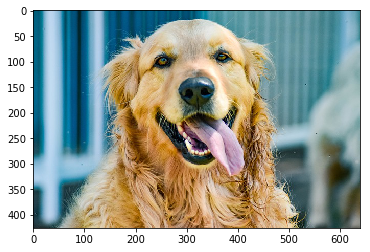

In [12]:
image_path = "../data/dog.jpeg"
img = Image.open(image_path)
plt.imshow(img)
plt.show()

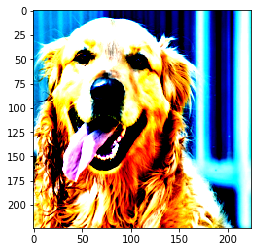

In [15]:
size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = ImageTransform(size, mean, std)
img_transformed = transform(img, phase="train")
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()